# Naomi Osaka

This code is a supplemental analysis to the story "Composed Pioneer in a Sea of Voices: Naomi Osaka" on [Tensight](https://medium.com/tensight): a story publication highlighting the incredible achievements of Asians in athletics, with a special emphasis on statistics.

### Attribution

Author: Alex Nakagawa [[Github](https://github.com/alexnakagawa)] [[Portfolio](https://alex.urspace.io/)]

The data used for this analysis is from [Jeff Sackmann / Tennis Abstract](https://github.com/JeffSackmann/tennis_atp). Licensed under [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-nc-sa/4.0/) 

---

In [11]:
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm

plt.style.use('fivethirtyeight')
%matplotlib inline

### I. Analysis

First, cleaning the matches tables. The data pulled has an error of the alpha-3 codes from Switzerland and Croatia, so they are changed here.

In [12]:
dirname = os.getcwd()
matches_2018 = pd.read_csv(dirname + '/data/tennis_wta/wta_matches_2018.csv', encoding = "ISO-8859-1")
matches_2018.replace({'CRO':'HRV', 'SUI':'CHE'}, regex=True, inplace=True)
matches_2019 = pd.read_csv(dirname + '/data/tennis_wta/wta_matches_2019.csv', encoding = "ISO-8859-1")
matches_2019.replace({'CRO':'HRV', 'SUI':'CHE'}, regex=True, inplace=True)
matches_2018.columns

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'winner_rank', 'winner_rank_points', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'loser_rank', 'loser_rank_points', 'score', 'best_of',
       'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced'],
      dtype='object')

Here, I'm finding the games that Osaka won in the US Open and other tournaments in 2018 and 2019. I'm also changing the `tourney_date` column, which is currently a string, into a `datetime` object.

In [13]:
total_2018_2019 = matches_2018.append(matches_2019, ignore_index=True)

osaka_usopen_2018 = matches_2018[(matches_2018['tourney_name']=='US Open') 
                            & (matches_2018['winner_name']=='Naomi Osaka')]
osaka_usopen_2018['tourney_date'] = pd.to_datetime(osaka_usopen_2018.tourney_date, format='%Y%m%d')

osaka_total_2018_2019 = total_2018_2019[(total_2018_2019['winner_name']=='Naomi Osaka') |
                (total_2018_2019['loser_name']=='Naomi Osaka')]
osaka_total_2018_2019['tourney_date'] = pd.to_datetime(osaka_total_2018_2019.tourney_date,
                                                            format='%Y%m%d')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Seeing Osaka's journey to the finals of the 2018 US Open.

In [14]:
cols = ['tourney_name', 'tourney_date', 'score', 'winner_ioc', 'winner_name', 'winner_rank',
        'winner_seed', 'loser_ioc', 'loser_name', 'loser_rank', 'loser_seed']
osaka_usopen_2018.loc[:, cols]

,tourney_name,tourney_date,score,winner_ioc,winner_name,winner_rank,winner_seed,loser_ioc,loser_name,loser_rank,loser_seed
2071,US Open,2018-08-27,6-3 6-2,JPN,Naomi Osaka,19.0,20.0,GER,Laura Siegemund,146.0,NaN
2109,US Open,2018-08-27,6-2 6-0,JPN,Naomi Osaka,19.0,20.0,ISR,Julia Glushko,162.0,NaN
2128,US Open,2018-08-27,6-0 6-0,JPN,Naomi Osaka,19.0,20.0,BLR,Aliaksandra Sasnovich,33.0,NaN
2137,US Open,2018-08-27,6-3 2-6 6-4,JPN,Naomi Osaka,19.0,20.0,BLR,Aryna Sabalenka,20.0,26.0
2142,US Open,2018-08-27,6-1 6-1,JPN,Naomi Osaka,19.0,20.0,UKR,Lesia Tsurenko,36.0,NaN
2144,US Open,2018-08-27,6-2 6-4,JPN,Naomi Osaka,19.0,20.0,USA,Madison Keys,14.0,14.0
2145,US Open,2018-08-27,6-2 6-4,JPN,Naomi Osaka,19.0,20.0,USA,Serena Williams,26.0,17.0


Exploring Osaka's record since the US Open championship.

In [20]:
import datetime as dt
osaka_after_usopen_2018 = osaka_total_2018_2019[osaka_total_2018_2019[ 
                                                'tourney_date']>dt.date(2018,8,27)]
osaka_wins = np.count_nonzero(osaka_after_usopen_2018['winner_name']=='Naomi Osaka')
osaka_losses = np.count_nonzero(osaka_after_usopen_2018['loser_name']=='Naomi Osaka')
print('Record since the 2018 US Open: {}W-{}L'.format(osaka_wins, osaka_losses))

Record since the 2018 US Open: 47W-18L


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
rankings_cols = ['ranking_date', 'ranking', 'player_id', 'ranking_points', 'tours']
rankings_current = pd.read_csv(dirname + '/data/tennis_wta/wta_rankings_current.csv',
                               names = rankings_cols, index_col=False,
                               encoding = "ISO-8859-1", header=None)

players_cols = ['player_id', 'first_name', 'last_name', 'hand', 'birth_date', 'country_code']
players = pd.read_csv(dirname + '/data/tennis_wta/wta_players.csv',
                      names = players_cols, index_col=False,
                      encoding = "ISO-8859-1", header=None)
players.replace({'CRO':'HRV', 'SUI':'CHE'}, regex=True, inplace=True)
players.drop(axis=0, index=0, inplace=True)
players.reset_index(drop=True, inplace=True)
players.head()

,player_id,first_name,last_name,hand,birth_date,country_code
0,200001,Martina,Hingis,R,19800930.0,CHE
1,200002,Mirjana,Lucic,R,19820309.0,HRV
2,200003,Justine,Henin,R,19820601.0,BEL
3,200004,Kerry Anne,Guse,R,19721204.0,AUS
4,200005,Jolene,Watanabe Giltz,R,19680831.0,USA


In [17]:
countries_codes_and_coordinates = pd.read_csv(dirname + '/data/countries.csv',
                      encoding = "ISO-8859-1")
players_and_region = pd.merge(players, countries_codes_and_coordinates,
                              left_on='country_code', right_on='alpha-3',
                              how='left')
players_and_region = players_and_region.iloc[:,:-4]
players_and_region[players_and_region['region']=='Asia']

,player_id,first_name,last_name,hand,birth_date,country_code,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region
8,200009,Tamarine,Tanasugarn,R,19770524.0,THA,Thailand,TH,THA,764.0,ISO 3166-2:TH,Asia,South-eastern Asia
13,200014,Tzipi,Obziler,R,19730419.0,ISR,Israel,IL,ISR,376.0,ISO 3166-2:IL,Asia,Western Asia
39,200040,Anna,Smashnova,R,19760716.0,ISR,Israel,IL,ISR,376.0,ISO 3166-2:IL,Asia,Western Asia
74,200075,Jing Qian,Yi,R,19740228.0,CHN,China,CN,CHN,156.0,ISO 3166-2:CN,Asia,Eastern Asia
84,200085,Ai,Sugiyama,R,19750705.0,JPN,Japan,JP,JPN,392.0,ISO 3166-2:JP,Asia,Eastern Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22946,222957,Eda,Arli,U,NaN,TUR,Turkey,TR,TUR,792.0,ISO 3166-2:TR,Asia,Western Asia
22957,222968,Piyaphat,Jongma,U,NaN,THA,Thailand,TH,THA,764.0,ISO 3166-2:TH,Asia,South-eastern Asia
22958,222969,Vera,Deepoem,U,NaN,THA,Thailand,TH,THA,764.0,ISO 3166-2:TH,Asia,South-eastern Asia
22965,222976,Senem,Ocal,U,NaN,TUR,Turkey,TR,TUR,792.0,ISO 3166-2:TR,Asia,Western Asia


## II. Visualizations

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


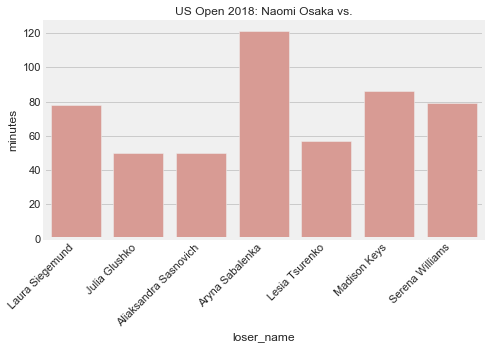

In [18]:
fig1, ax = plt.subplots(figsize=(7, 4))
osaka_usopen_2018['loser_and_rank'] = osaka_usopen_2018['loser_rank']
sns.barplot(x='loser_name', y='minutes', data=osaka_usopen_2018, color="salmon", saturation=.5)
sns.set(style="whitegrid")
plt.xticks(rotation=45)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right') # re-aligning the x-axis
plt.title('US Open 2018: Naomi Osaka vs.');

In [19]:
players

,player_id,first_name,last_name,hand,birth_date,country_code
0,200001,Martina,Hingis,R,19800930.0,CHE
1,200002,Mirjana,Lucic,R,19820309.0,HRV
2,200003,Justine,Henin,R,19820601.0,BEL
3,200004,Kerry Anne,Guse,R,19721204.0,AUS
4,200005,Jolene,Watanabe Giltz,R,19680831.0,USA
...,...,...,...,...,...,...
22965,222976,Senem,Ocal,U,NaN,TUR
22966,222977,Dana,Shakirova,U,NaN,RUS
22967,222978,Wanyi,Zhang,U,NaN,CHN
22968,222979,Ella,Leroy,R,NaN,USA


### License: MIT License
Copyright 2019 Tensight

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
